<a href="https://colab.research.google.com/github/Otavio8888/econometric_tests/blob/test5/EA09_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Econometria Aplicada [Módulo em Python]

### Mais especificações

## Especificação errada da forma funcional

Ao longo do curso, nós vimos diferentes formas funcionais diferentes de estabelecer relações entre a variável  dependente e os regressores. Saber se a forma funcional aplicada é a correta é essencial. Para isso, o teste RESET (Regression Equation Specification Error Test) provém uma maneira eficiente de testar essa hipótese.

Basicamente, o teste RESET é um teste F aplicado a uma segunda regressão que contém polinômios dos valores ajustados da regressão original. Claro que isso pode ser feito manualmente no Python, dado que tudo que precisa ser feito é um teste F. Entretanto, é mais simples utilizar a função **reset_ramsey** do *statsmodels*. Basta nós fornecermos a regressão e a ordem dos polinômios.

Testaremos a função com a regressão do dataset "hprice1", que traz características de imóveis. Veja que estamos definindo o grau dos polinômios para 3.

In [ ]:
!pip install wooldridge

You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached wooldridge-0.4.4-py3-none-any.whl (5.1 MB)


In [ ]:
import wooldridge as woo
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as smo

hprice1 = woo.dataWoo('hprice1')

reg = smf.ols(formula='price ~ lotsize + sqrft + bdrms', data=hprice1)
results = reg.fit()

reset_output = smo.reset_ramsey(res=results, degree=3)

print(reset_output)

<F test: F=4.668205534948939, p=0.012021711442881212, df_denom=82, df_num=2>


## Erro de medida

O erro de medida de uma variável pode ter algumas consequências. Se o erro ocorrer na variável dependente, as consequências não serão muito graves. Se não houver nenhuma correlação do erro com os regressores, os parâmetros se tornam menos precisos, mas ainda são consistentes.

Podemos simular o que aconteceria no caso em que houvesse um erro de medida na variável dependente, de modo que:

\begin{equation}
y^{*}=\beta_{0}+\beta_{1} x+u, \quad y=y^{*}+e_{0}
\end{equation}



In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.formula.api as smf


# amostra e número de repetições
n = 1000
r = 1000

# Betas reais:
beta0 = 2
beta1 = 3

b1 = np.empty(r)
b1_me = np.empty(r)

# Amostra aleatória de X
x = stats.norm.rvs(4, 1, size=n)

for i in range(r):
    u = stats.norm.rvs(0, 1, size=n)

    ystar = beta0 + beta1 * x + u

    e0 = stats.norm.rvs(0, 1, size=n)
    y = ystar + e0
    df = pd.DataFrame({'ystar': ystar, 'y': y, 'x': x})

    reg_star = smf.ols(formula='ystar ~ x', data=df)
    results_star = reg_star.fit()
    b1[i] = results_star.params['x']

    reg_me = smf.ols(formula='y ~ x', data=df)
    results_me = reg_me.fit()
    b1_me[i] = results_me.params['x']

#Média do beta:
b1_mean = np.mean(b1)
b1_me_mean = np.mean(b1_me)
print(f'b1_mean: {b1_mean}\n')
print(f'b1_erro_mean: {b1_me_mean}\n')

#Variância:
b1_var = np.var(b1, ddof=1)
b1_me_var = np.var(b1_me, ddof=1)
print(f'b1_var: {b1_var}\n')
print(f'b1_erro_var: {b1_me_var}\n')

b1_mean: 3.0000190331937766

b1_erro_mean: 3.000006295897526

b1_var: 0.0009539077645870959

b1_erro_var: 0.0019466479025503807



Enquanto a média do Beta fica praticamente igual, a variância da estimação com erro de medida fica bem maior do que sem.

Quando o erro de medida se dá em uma variável independente, as consequências são mais severas, mesmo quando ele não for relacionado com o regressor. Neste caso, os parâmetros serão viesados e inconsistentes.

Se simularmos o seguinte modelo:

\begin{equation}
y=\beta_{0}+\beta_{1} x^{*}+u, \quad x=x^{*}+e_{1}
\end{equation}

In [ ]:
n = 1000
r = 1000

beta0 = 2
beta1 = 3

b1 = np.empty(r)
b1_me = np.empty(r)

xstar = stats.norm.rvs(4, 1, size=n)

for i in range(r):
    u = stats.norm.rvs(0, 1, size=n)

    y = beta0 + beta1 * xstar + u

    e1 = stats.norm.rvs(0, 1, size=n)
    x = xstar + e1
    df = pd.DataFrame({'y': y, 'xstar': xstar, 'x': x})

    reg_star = smf.ols(formula='y ~ xstar', data=df)
    results_star = reg_star.fit()
    b1[i] = results_star.params['xstar']

    reg_me = smf.ols(formula='y ~ x', data=df)
    results_me = reg_me.fit()
    b1_me[i] = results_me.params['x']

b1_mean = np.mean(b1)
b1_me_mean = np.mean(b1_me)
print(f'b1_mean: {b1_mean}\n')
print(f'b1_erro_mean: {b1_me_mean}\n')

b1_var = np.var(b1, ddof=1)
b1_me_var = np.var(b1_me, ddof=1)
print(f'b1_var: {b1_var}\n')
print(f'b1_erro_var: {b1_me_var}\n')

b1_mean: 2.9988359270185807

b1_erro_mean: 1.5032507167962645

b1_var: 0.001009577287776433

b1_erro_var: 0.0016447173528181805



Perceba que agora a média da simulação com erro de medida está bem distante do caso sem erro.

## Observações ausentes

Em muitos datasets, nós não temos todas as observações para todas as variáveis. Isso pode ocorrer por vários motivos, como, por exemplo, em um dataset gerado por questionário, em que o respondente se recusa a dar alguma resposta. No Python, utilizamos a biblioteca *numpy* para levar em conta esses casos, que são definidos como o valor **nan**.

In [ ]:
x = np.array([-1, 0, 1, np.nan, np.inf, -np.inf])
logx = np.log(x)
invx = np.array(1 / x)
ncdf = np.array(stats.norm.cdf(x))
isnanx = np.isnan(x)

results = pd.DataFrame({'x': x, 'logx': logx, 'invx': invx,
                        'logx': logx, 'ncdf': ncdf, 'isnanx': isnanx})
print(results)

     x  logx  invx      ncdf  isnanx
0 -1.0   NaN  -1.0  0.158655   False
1  0.0  -inf   inf  0.500000   False
2  1.0   0.0   1.0  0.841345   False
3  NaN   NaN   NaN       NaN    True
4  inf   inf   0.0  1.000000   False
5 -inf   NaN  -0.0  0.000000   False


C:\Users\Dell\AppData\Local\Temp\ipykernel_19652\3773250157.py:2: RuntimeWarning: divide by zero encountered in log
  logx = np.log(x)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19652\3773250157.py:2: RuntimeWarning: invalid value encountered in log
  logx = np.log(x)
C:\Users\Dell\AppData\Local\Temp\ipykernel_19652\3773250157.py:3: RuntimeWarning: divide by zero encountered in divide
  invx = np.array(1 / x)


A depender do dataset, os valores ausentes podem estar codificados como um valor extremo, como "999". Nesses casos, o ideal é transformar para um "np.nan" no começo da análise.

Em termos de modelagem, uma regressão linear não pode ser estimada com dados faltantes. A função **ols** apenas remove as observações com alguma variável faltante. O número de observações removidas é informado no **summary()**.

Se o desejo for de não perder a amostra, a depender do caso, pode ser interessante substituir os "np.nan" pela média ou mediana da coluna.

## Outliers

Outliers são observações que não seguem o mesmo modelo do restante dos dados. Ou seja, são valores em que a variável dependente assume valores extremos, dado os valores das variáveis independentes da observação. Para identificarmos outliers na regressão existem alguns métodos, entre eles os resíduos normalizados pela distribuição t-student. Obtemos eles com no parâmetro *resid_studentized_external* da função **get_influence()**. Primeiramente mostraremos um exemplo sem outliers.

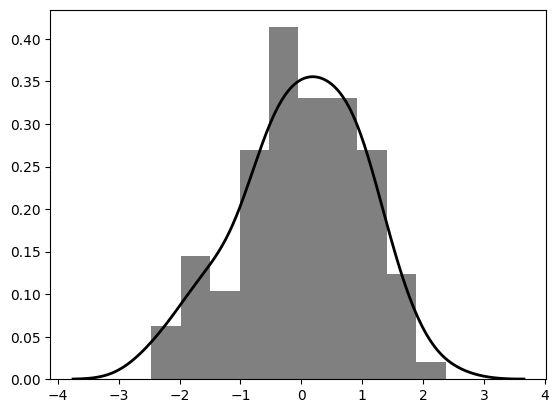

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

x = np.linspace(0, 10, 100, endpoint = False)
y = 3 + 2*x + np.random.normal(scale = 3, size=x.shape)

df = pd.DataFrame({"x" : x,
                  "y" : y})

reg = smf.ols(formula='y~x', data = df)
results = reg.fit()

studres = results.get_influence().resid_studentized_external

kde = sm.nonparametric.KDEUnivariate(studres)
kde.fit()

plt.hist(studres, color='grey', density=True)
plt.plot(kde.support, kde.density, color='black', linewidth=2)

Agora, incluíremos 4 observações com valores de y bem diferentes da relação que definimos.

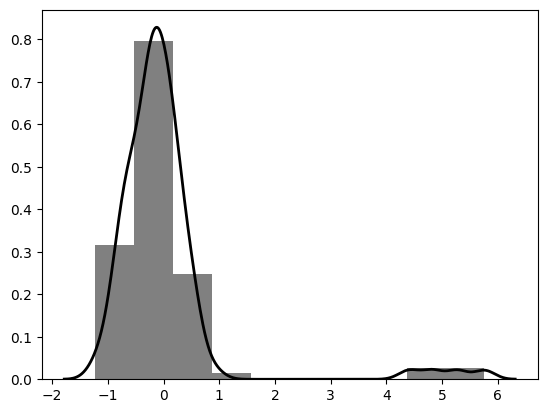

In [ ]:
x = np.linspace(0, 10, 100, endpoint = False)
y = 3 + 2*x + np.random.normal(scale = 3,size=x.shape)

#outliers
x = np.append(x,[6,7,8,9])
y = np.append(y,[50,55,60,65])

df = pd.DataFrame({"x" : x,
                  "y" : y})

reg = smf.ols(formula='y~x', data = df)
results_out = reg.fit()

studres = results_out.get_influence().resid_studentized_external

kde = sm.nonparametric.KDEUnivariate(studres)
kde.fit()

plt.hist(studres, color='grey', density=True)
plt.plot(kde.support, kde.density, color='black', linewidth=2)

Perceba que podemos ver os outliers na distribuição.

In [ ]:
results_out.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     79.43
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           2.07e-14
Time:                        09:18:00   Log-Likelihood:                -365.35
No. Observations:                 104   AIC:                             734.7
Df Residuals:                     102   BIC:                             740.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0140      1.622      1.242      0.217      -1.202       5.231
x              2.4865      0.279      8.912      0.000       1.933       3.040
==============================================================================
Omnibus:                      105.728   Durbin-Watson:                   0.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1067.568
Skew:                           3.552   Prob(JB):                    1.52e-232
Kurtosis:                      16.996   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

E o coeficiente estimado se altera significativamente em relação ao parâmetro real.

Uma alternativa para contornar a presença de outliers é o estimador "Least absolute deviations", o LAD. Enquanto no OLS nós minimizamos a soma dos quadrados dos resíduos, nesse estimador nós minimizamos a soma dos valores absolutos dos resíduos. Esse estimador é um caso especial da regressão quantílica, em que tentamos estimar os parâmetros da mediana condicional, ao invés da média condicional. Para implementar esse estimador no Python utilizamos o comando **quantreg**.

In [ ]:
reg = smf.quantreg(formula='y~x', data = df)
results_LAD = reg.fit(q=.5)
results_LAD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.4349
Model:                       QuantReg   Bandwidth:                       3.831
Method:                 Least Squares   Sparsity:                        10.07
Date:                Tue, 01 Aug 2023   No. Observations:                  104
Time:                        09:18:00   Df Residuals:                      102
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1544      0.996      3.166      0.002       1.178       5.131
x              2.1398      0.171     12.483      0.000       1.800       2.480
==============================================================================
"""

Perceba que os parâmetros estimados ficaram bem mais próximos dos valores reais.